In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from  sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
data=pd.read_csv("AmesHousing.txt",delimiter="\t")
data.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour    ...     Pool Area Pool QC  Fence  \
0   NaN       IR1          Lvl    ...             0     NaN    NaN   
1   NaN       Reg          Lvl    ...             0     NaN  MnPrv   
2   NaN       IR1          Lvl    ...             0     NaN    NaN   
3   NaN       Reg          Lvl    ...             0     NaN    NaN   
4   NaN       IR1          Lvl    ...             0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0          NaN        0       5    2010       WD           Normal     215000  
1          NaN        0       6    2010       WD           Normal     105000  
2         Gar2    12500       6    2010       WD           Normal     172000  
3          NaN        0       4    2010       WD           Normal     244000  
4          NaN        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [5]:
train=data[:1460]
train_dooble=data[:1460]
test=data[1460:]

In [6]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [7]:
def train_and_test(train,test):
    data_train=select_features(train).drop('SalePrice')
    rmse=[]
    av_rmse=rmse.mean()
    return rmse,av_rmse    
    
    

Columns to remove.
//
Columns leak data about the final sale:
"PID","Order"

Удаляем столбец не влияющий на конечную цену.
В объекте sum_missing_values сохраним данные о количестве отсутствующих 
значений в столбцах.
В объекте  columns_have_missing_values данные о количестве отсутствующих значений только по столбцам имеющим по крайней мере одно отсутствующее значение.

In [8]:
explorer_train=train.drop(["PID","Order"],axis=1)
sum_missing_values=explorer_train.isnull().sum()
columns_have_missing_values=sum_missing_values[sum_missing_values!=0]
print(columns_have_missing_values)

Lot Frontage       249
Alley             1351
Mas Vnr Type        11
Mas Vnr Area        11
Bsmt Qual           40
Bsmt Cond           40
Bsmt Exposure       41
BsmtFin Type 1      40
BsmtFin SF 1         1
BsmtFin Type 2      41
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       1
Bsmt Half Bath       1
Fireplace Qu       717
Garage Type         74
Garage Yr Blt       75
Garage Finish       75
Garage Qual         75
Garage Cond         75
Pool QC           1459
Fence             1163
Misc Feature      1400
dtype: int64


В объекте  columns_have_missing_values_less_25_precent данные по колонкам в которых количество отсутствующих значений не более 25% от числа строк в обучающих данных.

In [9]:
len_train=explorer_train.shape[0]
columns_have_missing_values_less_25_precent=sum_missing_values[sum_missing_values<len_train/4]
print(columns_have_missing_values_less_25_precent.index)    

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',


Смотрим типы столбцов.

In [10]:
explorer_train.dtypes

MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
                   ...   
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type 

In [11]:
train[columns_have_missing_values_less_25_precent.index].dtypes


MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
                   ...   
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Full Bath           int64
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGr

Составим датафрейм не числовых столбцов и сохраним данные столбцы в not_number_data.

In [12]:
not_number_data=train[columns_have_missing_values_less_25_precent.index].select_dtypes(include=['object'])
not_number_data.head()

MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0        RL   Pave       IR1          Lvl    AllPub     Corner        Gtl   
1        RH   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2        RL   Pave       IR1          Lvl    AllPub     Corner        Gtl   
3        RL   Pave       Reg          Lvl    AllPub     Corner        Gtl   
4        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   

  Neighborhood Condition 1 Condition 2      ...       Electrical Kitchen Qual  \
0        NAmes        Norm        Norm      ...            SBrkr           TA   
1        NAmes       Feedr        Norm      ...            SBrkr           TA   
2        NAmes        Norm        Norm      ...            SBrkr           Gd   
3        NAmes        Norm        Norm      ...            SBrkr           Ex   
4      Gilbert        Norm        Norm      ...            SBrkr           TA   

  Functional Garage Type Garage Finish Garage Qual Garage Cond Paved Drive  \
0        Typ      Attchd           Fin          TA          TA           P   
1        Typ      Attchd           Unf          TA          TA           Y   
2        Typ      Attchd           Unf          TA          TA           Y   
3        Typ      Attchd           Fin          TA          TA           Y   
4        Typ      Attchd           Fin          TA          TA           Y   

  Sale Type Sale Condition  
0       WD          Normal  
1       WD          Normal  
2       WD          Normal  
3       WD          Normal  
4       WD          Normal  

[5 rows x 38 columns]

Выяснить количество различных значений по каждому столбцу и выведем те столбцы в которых какое-либо значение составляет более 95% от общего количества. 

Для начала посмотрим на количество различных значений по каждому столбцу.

In [13]:
def count_unique(ser):
    dic=ser.unique()
    return len(dic)
not_number_data.apply(count_unique,axis=0)

MS Zoning          6
Street             2
Lot Shape          4
Land Contour       4
Utilities          3
Lot Config         5
Land Slope         3
Neighborhood      26
Condition 1        9
Condition 2        6
Bldg Type          5
House Style        8
Roof Style         6
Roof Matl          5
Exterior 1st      14
Exterior 2nd      16
Mas Vnr Type       5
Exter Qual         4
Exter Cond         5
Foundation         6
Bsmt Qual          5
Bsmt Cond          6
Bsmt Exposure      5
BsmtFin Type 1     7
BsmtFin Type 2     7
Heating            6
Heating QC         4
Central Air        2
Electrical         4
Kitchen Qual       5
Functional         7
Garage Type        7
Garage Finish      4
Garage Qual        6
Garage Cond        6
Paved Drive        3
Sale Type          9
Sale Condition     5
dtype: int64

Как видно достаточно большое количество уникальных значений в следующих при-
знаках "Neighborhood":26,"Exterior 1st":14,"Exterior 2nd":16.Стоит рассмотреть необходимость использования данных признаков в обучении.

In [14]:
def max_number_off_occurrences(series):
    series_counts=series.value_counts()
    return series_counts.max()/series.shape[0]
data_max=not_number_data.apply(max_number_off_occurrences)
print(data_max[data_max>0.95].index)    
        
            

Index(['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl',
       'Heating'],
      dtype='object')


Как мы видим признаки ['Street', 'Utilities', 'Land Slope', 'Condition 2','RoofMatl','Heating'] имеют значения более 95% которых относятся к 1 категории, поэтому данные признаки можно исключить.

Выясним какие признаки являются числовыми,но их необходимо преобразовать 
в категориальные. 

In [15]:
#Посмотрим на числовые признаки
current_date=train[columns_have_missing_values_less_25_precent.index].select_dtypes(exclude=['object'])
current_date.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [16]:
current_date["MS SubClass"].head()

0    20
1    20
2    20
3    20
4    60
Name: MS SubClass, dtype: int64

"MS Subclass"-является числовым но его необходимо преобразовать
в категориальный.
"Mo Sold"-является номером месяца продажи соответственно его можно отнести
к категориальному признаку, так как сезонность также влияет на цену.

Также стоит отметить признаки
"Yr Sold"-год продажи
'Year Built'-год строительства
'Year Remod/Add'-год реконструкции
'Garage Yr Blt'-год строительства гаража 
Представляет интерес количество лет от постройки(реконструкции) до продажи, поэтому используя данные столбцы мы создадим дополнительные столбцы.




# Выводы

Давайте подытожим преобразования которые необходимо произвести в нашей функции.
#1)Удаляем столбцы ["PID","Order"].
#2)Оставляем признаки в которых количество отсутствующих значений не более 25%, а именно columns_have_missing_values_less_25_precent.index
#3)Удалим столбцы с большим количеством различных категориальных значений
  ["Neighborhood","Exterior 1st","Exterior 2nd"]
#4)Удаляем категориальные признаки в которых одно из значений составляет более 95%  ['Street', 'Utilities', 'Land Slope', 'Condition 2','RoofMatl','Heating'] 
#5)Выбираем и преобразовываем к типу 'category' все категориальные признаки
включая числовые ["MS Subclass","Mo Sold"]и выполняем dummies.
#6)Создаём из признаков  "Yr Sold","Year Built",'Year Remod/Add','Garage Yr Blt' доп.характеристики количество лет до продажи.
#7) Во всех числовых признаках  отсутствующие  значения меняем на среднее значение по признаку.

In [17]:
def transform_features(train):
    train_new=train.drop(["PID","Order"],axis=1)
    train_new=train_new[columns_have_missing_values_less_25_precent.index]
    train_new=train_new.drop(["Neighborhood","Exterior 1st","Exterior 2nd"],axis=1)
    train_new=train_new.drop(['Street', 'Utilities', 'Land Slope', 'Condition 2','Roof Matl','Heating'],axis=1)
    
    train_new['years_until_remod']=train_new['Year Remod/Add']-train_new["Year Built"]
    train_new['years_until_sold']=train_new['Year Remod/Add']-train_new["Yr Sold"]
    for index in train_new['Yr Sold'].index:
        if train_new['Yr Sold'][index]  is np.nan:
            train_new['Yr Sold'][index]=train_new['Year Remod/Add'][index]
    train_new['garage_until_sold']=train_new['Garage Yr Blt']
    train_new=train_new.drop(["Yr Sold","Year Built",'Year Remod/Add','Garage Yr Blt'],axis=1)       
    
    text_columns=train_new.select_dtypes(include=["object"]).columns
    for col in text_columns:
        train_new[col]=train_new[col].astype('category')
    train_new["MS SubClass"]=train_new["MS SubClass"].astype('category')
    train_new["Mo Sold"]=train_new["Mo Sold"].astype('category')
    
    numerical_columns_float=train_new.select_dtypes(exclude=['object','category','int']).columns
    
    numerical_columns_int=train_new.select_dtypes(exclude=['object','category','float']).columns
        
    train_new[numerical_columns_float]=train_new[numerical_columns_float].fillna(value=train_new[numerical_columns_float].mean())
    train_new[numerical_columns_int]=train_new[numerical_columns_int].fillna(value=train_new[numerical_columns_int].median())
    
    for col in text_columns:
        cat_data=pd.get_dummies(train_new[col],prefix=col)
        train_new=train_new.drop(col,axis=1)
        train_new=pd.concat([train_new,cat_data],axis=1)
        
    for col in ["MS SubClass","Mo Sold"]:
        cat_data=pd.get_dummies(train_new[col],prefix=col)
        train_new=train_new.drop(col,axis=1)
        train_new=pd.concat([train_new,cat_data],axis=1)    
        
    
    return train_new

train_transform=transform_features(train)
test_transform=transform_features(test)

In [18]:
train_transform.shape


(1460, 210)

In [19]:
data_clean=transform_features(data)

In [20]:
data_clean.shape

(2930, 219)

In [87]:
matrix_cor=data_clean.corr()
matrix_strong_index=matrix_cor[abs(matrix_cor["SalePrice"])>0.2].index
matrix_strong_corr=data_clean[matrix_strong_index].corr()
matrix_strong_corr.shape

(66, 66)

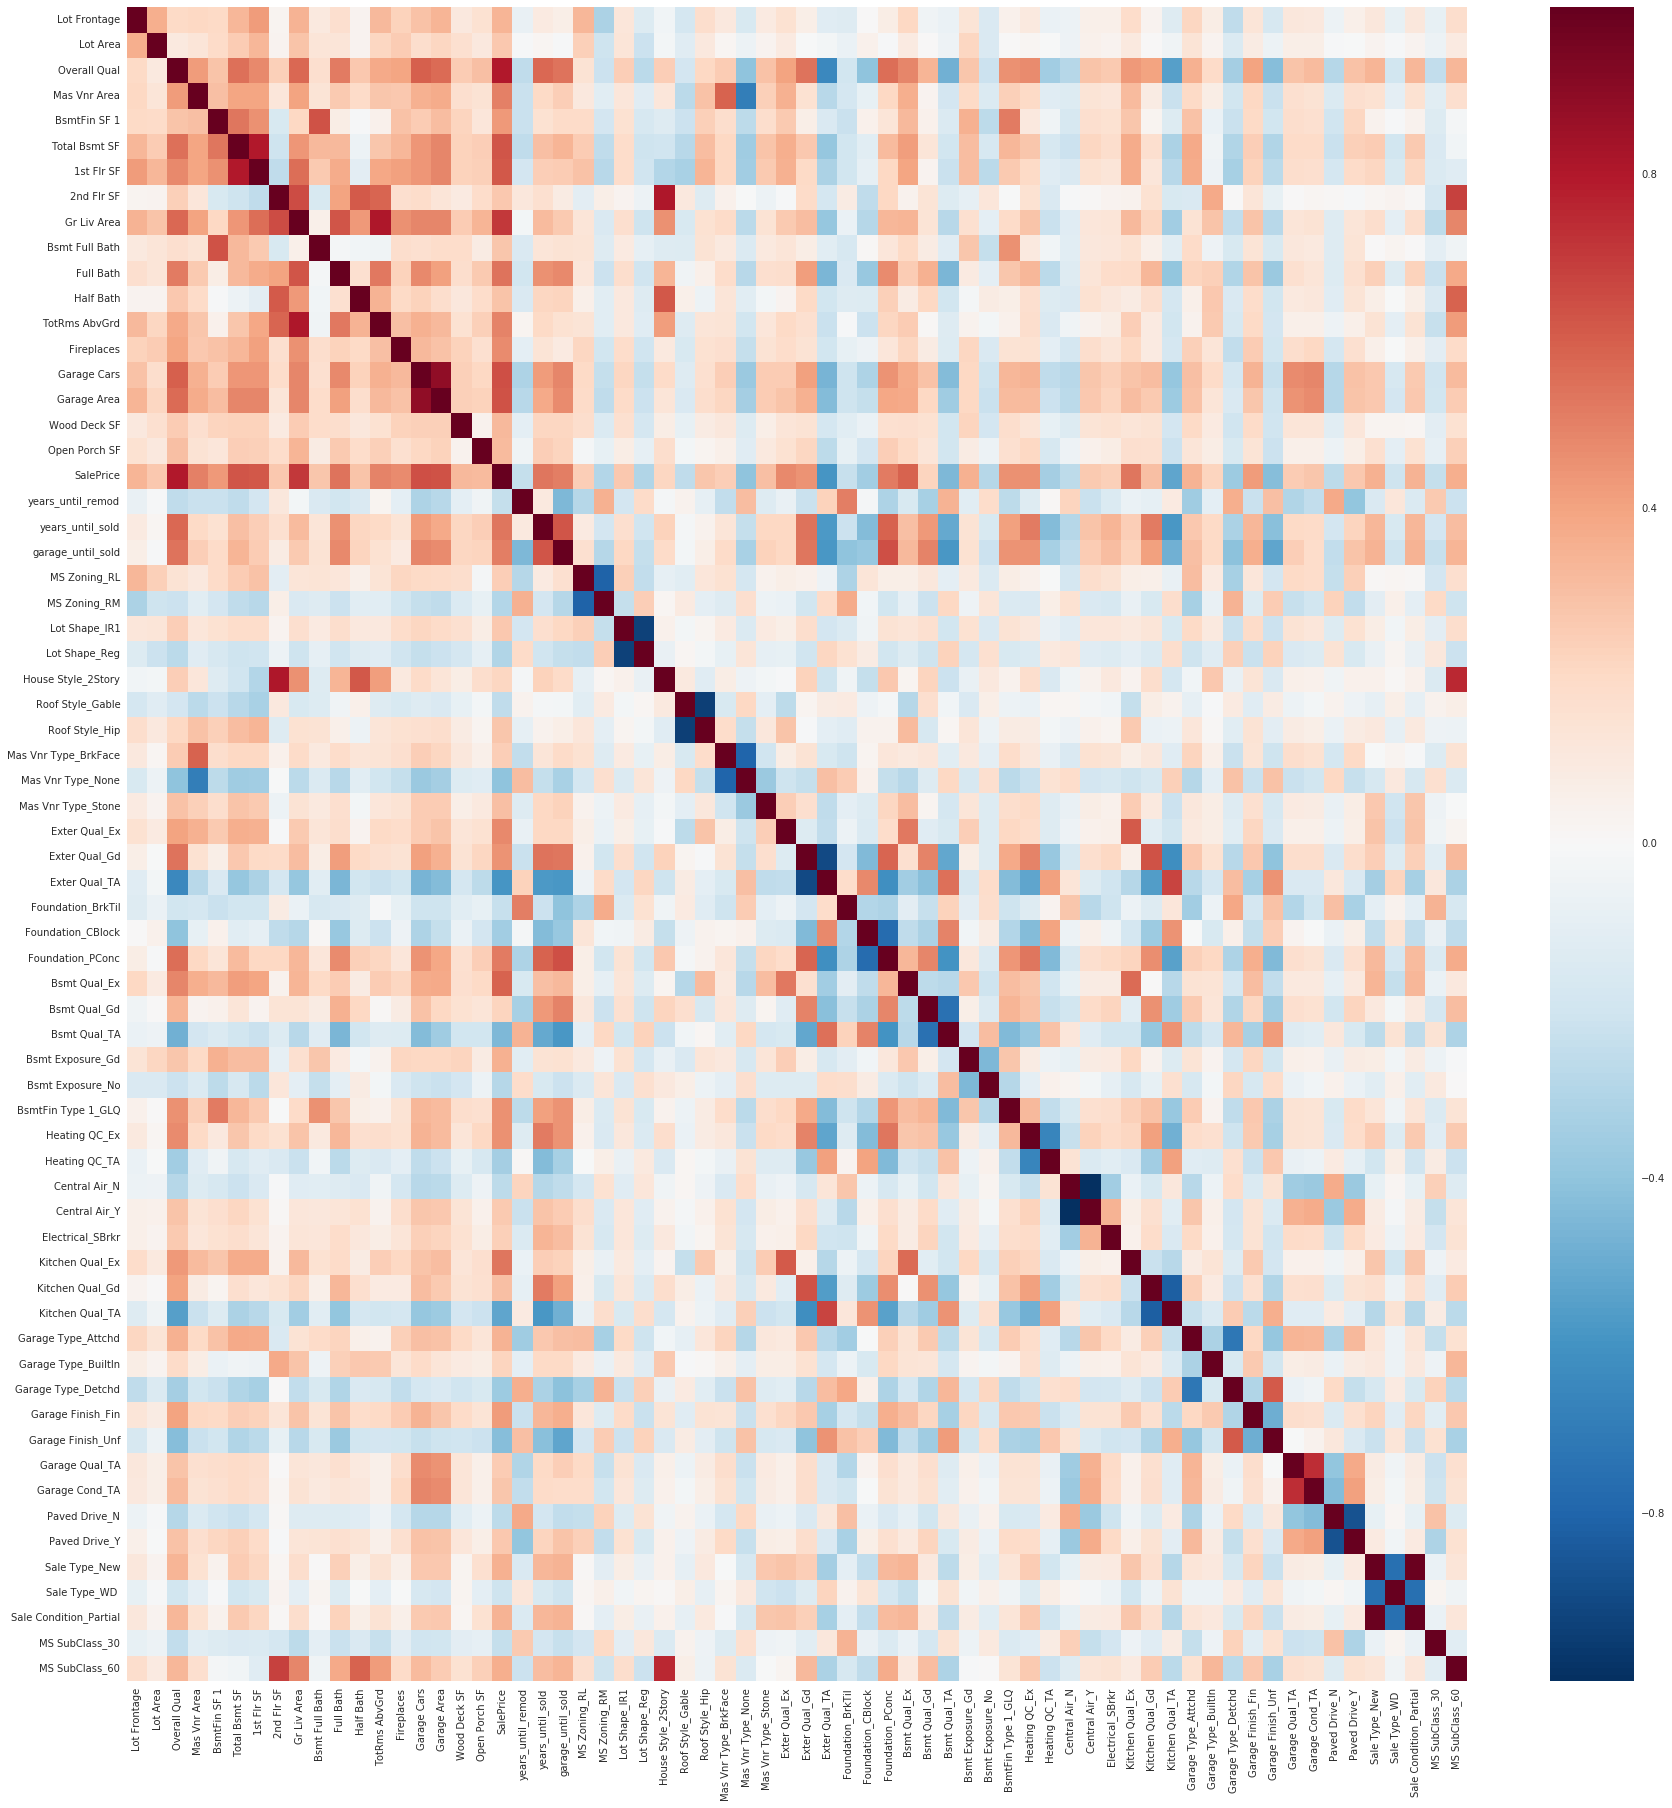

In [88]:
plt.figure(figsize=(30,30))
sns.heatmap(matrix_strong_corr)
plt.show()

In [100]:
def select_features(train_transform):
    matrix_corr=train_transform.corr()
    matrix_strong_indexs=matrix_corr[abs(matrix_corr['SalePrice'])>0.2].index
    #можно добавлять и дальше
    return train_transform[matrix_strong_indexs]

In [101]:
train_select=select_features(transform_features(train))
test_select=select_features(transform_features(test))
train_select.shape,test_select.shape

((1460, 65), (1470, 69))

In [102]:
clumns=list(train_select.columns)
for col in test_select.columns:
    try:
        
        clumns.remove(col)
    except ValueError:
        print(col)
    

Bsmt Unf SF
Land Contour_HLS
House Style_2Story
Sale Type_WD 
Sale Condition_Normal


In [103]:
clumns=list(test_select.columns)
for col in train_select.columns:
    try:
        
        clumns.remove(col)
    except ValueError:
        print(col)

Electrical_FuseA


In [104]:
data_select=pd.concat([train_select,test_select])
data_select.shape

(2930, 70)

In [105]:
data_transform=select_features(transform_features(data))
data_transform['SalePrice']

0       215000
1       105000
2       172000
3       244000
4       189900
5       195500
6       213500
7       191500
8       236500
9       189000
10      175900
11      185000
12      180400
13      171500
14      212000
15      538000
16      164000
17      394432
18      141000
19      210000
20      190000
21      170000
22      216000
23      149000
24      149900
25      142000
26      126000
27      115000
28      184000
29       96000
         ...  
2900    320000
2901    369900
2902    359900
2903     81500
2904    215000
2905    164000
2906    153500
2907     84500
2908    104500
2909    127000
2910    151400
2911    126500
2912    146500
2913     73000
2914     79400
2915    140000
2916     92000
2917     87550
2918     79500
2919     90500
2920     71000
2921    150900
2922    188000
2923    160000
2924    131000
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, dtype: int64

In [106]:
train_transform_select=data_transform[:1460]
test_transform_select=data_transform[1460:]

In [107]:
from sklearn.metrics import mean_squared_error

In [108]:
y=train_transform_select[["SalePrice"]]
X=train_transform_select.drop(["SalePrice"],axis=1)
lr=LinearRegression()
lr.fit(X,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
y_test=test_transform_select["SalePrice"]
X_test=test_transform_select.drop(["SalePrice"],axis=1)
y_predict=lr.predict(X_test)
MSE_simple=mean_squared_error(y_test,y_predict)
RMSE_simple=MSE_simple**.5
print(MSE_simple,RMSE_simple)

1515660993.85 38931.4910304


In [110]:
kf=KFold(n_splits=10, shuffle=True, random_state=1)
list_mse=cross_val_score(lr,data_clean.drop(['SalePrice'],axis=1),data_clean['SalePrice'],cv=kf,scoring="neg_mean_squared_error")
list_rmse=[x**.5 for x in abs(list_mse)]
print(np.mean(abs(list_mse)),np.mean(list_rmse))

976718373.843 30375.6127422


(array([   2.,    0.,    2.,    4.,    3.,    9.,   21.,   14.,   26.,
          65.,   48.,   61.,   83.,  116.,  143.,  197.,  170.,  206.,
         150.,  159.,  109.,  135.,  111.,  129.,   81.,   77.,   73.,
          74.,   59.,   60.,   49.,   49.,   42.,   37.,   33.,   32.,
          30.,   24.,   23.,   10.,   24.,   24.,   13.,   16.,   11.,
           8.,    9.,    3.,   17.,    9.,    7.,    8.,    8.,    6.,
           6.,    5.,    1.,    4.,    3.,    3.,    3.,    3.,    3.,
           1.,    1.,    3.,    0.,    0.,    0.,    0.,    2.,    1.,
           1.,    2.,    0.,    0.,    1.,    2.,    0.,    0.,    2.,
           1.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    1.]),
 array([  12789.  ,   20211.11,   27633.22,   35055.33,   42477.44,
          49899.55,   57321.66,   64743.77,   72165.88,   79587.99,
          87010.1 ,   94432.21,  101854.32,  109276.43,  116698.54,
      

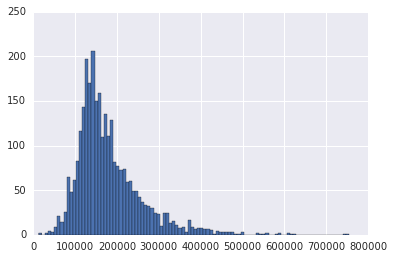

In [112]:
plt.hist(data_clean["SalePrice"],100)